**Mounting the drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing the required libraries**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import os
import glob
import matplotlib.pyplot as plt

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D,Activation,AveragePooling2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

**Retriving data from google drive**

In [ ]:
train_dir ="/content/drive/MyDrive/newdata/train"
test_dir="/content/drive/MyDrive/data/test"

**Counting Total number of images in the dataset**

In [ ]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count

In [ ]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
test_samples=get_files(test_dir)
print(num_classes,"Classes")
print(train_samples,"Train images")
print(test_samples,"Test images")

4 Classes
928 Train images
20 Test images


In [ ]:
def get_images(directory):
  count = 0
  for root_dir, cur_dir, files in os.walk(directory):
      count += len(files)
  return count

In [ ]:
"""
hazardous =get_images("/content/drive/MyDrive/data/train/hazardous")
general =get_images("/content/drive/MyDrive/data/train/general")
infectious =get_images("/content/drive/MyDrive/data/train/infectious")
radioactive =get_images("/content/drive/MyDrive/data/train/radioactive")
print("Class - General    :",general)
print("Class - Hazardous  :",hazardous)
print("Class - Infectious :",infectious)
print("Class - Radioactive:",radioactive)
"""

'\nhazardous =get_images("/content/drive/MyDrive/data/train/hazardous")\ngeneral =get_images("/content/drive/MyDrive/data/train/general")\ninfectious =get_images("/content/drive/MyDrive/data/train/infectious")\nradioactive =get_images("/content/drive/MyDrive/data/train/radioactive")\nprint("Class - General    :",general)\nprint("Class - Hazardous  :",hazardous)\nprint("Class - Infectious :",infectious)\nprint("Class - Radioactive:",radioactive)\n'

In [ ]:
hazardous =get_images("/content/drive/MyDrive/newdata/train/hazardous")
general =get_images("/content/drive/MyDrive/newdata/train/general")
infectious =get_images("/content/drive/MyDrive/newdata/train/infectious")
radioactive =get_images("/content/drive/MyDrive/newdata/train/radioactive")
print("Class - General    :",general)
print("Class - Hazardous  :",hazardous)
print("Class - Infectious :",infectious)
print("Class - Radioactive:",radioactive)

Class - General    : 147
Class - Hazardous  : 518
Class - Infectious : 158
Class - Radioactive: 105


**Preprocessing data : Rescaling, Shearing, Zoom, Transform**

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 validation_split=0.2,                          # validation split 20%.
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
# set height and width and color of input image.
num_classes=4
IMAGE_SHAPE = [224, 224]
batch_size=32 
epochs = 10

trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory=train_dir,target_size=(224, 224), shuffle=False, class_mode='categorical')
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(directory=test_dir, target_size=(224, 224),shuffle=False, class_mode='categorical')

Found 928 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


**Classes in the dataset**

In [ ]:
train_data_gen.class_indices

{'general': 0, 'hazardous': 1, 'infectious': 2, 'radioactive': 3}

**VGG 16**

In [ ]:
import numpy as np
import pandas as pd

import sklearn.metrics as metrics
import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

In [ ]:
vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)

In [ ]:
model.fit_generator(train_data_gen, steps_per_epoch = training_steps_per_epoch, validation_data=test_data_gen, validation_steps=validation_steps_per_epoch,epochs=epochs, verbose=1)
print('Training Completed!')

Epoch 1/10
29/29 [==============================] - 379s 13s/step - loss: 32.6957 - accuracy: 0.4461 - val_loss: 4.7583 - val_accuracy: 0.4500
Epoch 2/10
29/29 [==============================] - 340s 12s/step - loss: 2.6420 - accuracy: 0.8481 - val_loss: 6.1074 - val_accuracy: 0.5500
Epoch 3/10
29/29 [==============================] - 342s 12s/step - loss: 0.6759 - accuracy: 0.9397 - val_loss: 5.0929 - val_accuracy: 0.5500
Epoch 4/10
29/29 [==============================] - 342s 12s/step - loss: 0.2109 - accuracy: 0.9752 - val_loss: 4.2355 - val_accuracy: 0.6500
Epoch 5/10
29/29 [==============================] - 342s 12s/step - loss: 0.0153 - accuracy: 0.9957 - val_loss: 4.0818 - val_accuracy: 0.7000
Epoch 6/10
29/29 [==============================] - 343s 12s/step - loss: 3.4483e-04 - accuracy: 1.0000 - val_loss: 4.0559 - val_accuracy: 0.7000
Epoch 7/10
29/29 [==============================] - 344s 12s/step - loss: 2.1019e-04 - accuracy: 1.0000 - val_loss: 4.0548 - val_accuracy: 0.65

In [ ]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =test_data_gen.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

1/1 [==============================] - 8s 8s/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.44      0.80      0.57         5
           2       0.80      0.80      0.80         5
           3       0.83      1.00      0.91         5

    accuracy                           0.65        20
   macro avg       0.52      0.65      0.57        20
weighted avg       0.52      0.65      0.57        20



In [ ]:
import seaborn as sns
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_data_gen.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

1/1 [==============================] - 7s 7s/step


array([[0, 4, 0, 1],
       [0, 4, 1, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 5]])

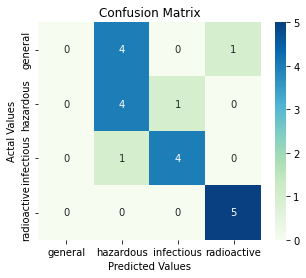

In [ ]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ["general","hazardous","infectious","radioactive"], 
                     columns = ["general","hazardous","infectious","radioactive"])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap="GnBu")
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
score,accuracy =model.evaluate(test_generator,verbose=1)
print("Test score is {}".format(score))
print("Test accuracy is {}".format(accuracy))

In [ ]:
keras_file="/content/drive/MyDrive/Models created/VGGModelnew.h5"
tf.keras.models.save_model(model,keras_file)

# **Load the Model for testing**

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [ ]:
#load saved model
model = load_model('/content/drive/MyDrive/Models created/VGGModelnew.h5') 

1/1 [==============================] - 1s 828ms/step
[[1.1715831e-25 9.9992514e-01 7.4867363e-05 3.6120809e-15]]
[1]
hazardous


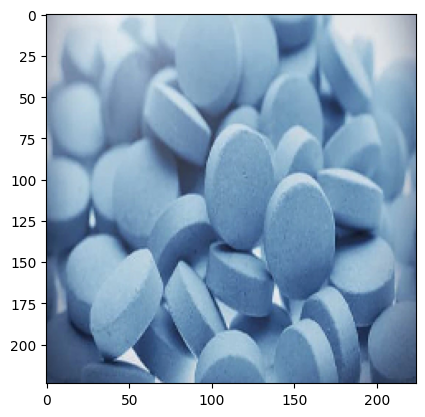

In [ ]:
img_path = '/content/drive/MyDrive/data/test/hazardous/medical 1310.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

1/1 [==============================] - 0s 497ms/step
[[7.1296392e-29 6.2744658e-12 1.1253795e-11 1.0000000e+00]]
[3]
radioactive


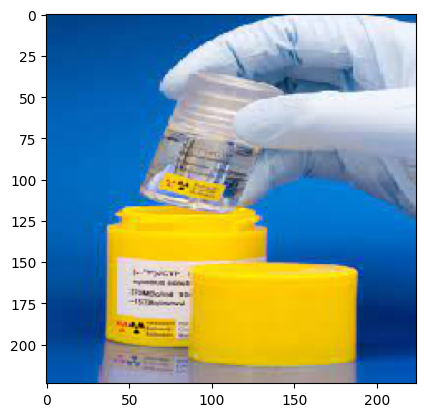

In [ ]:
img_path = '/content/drive/MyDrive/data/test/radioactive/Copy of Copy of download (4).jpeg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

1/1 [==============================] - 0s 498ms/step
[[1.8108290e-10 1.9357272e-04 9.9969280e-01 1.1366007e-04]]
[2]
infectious


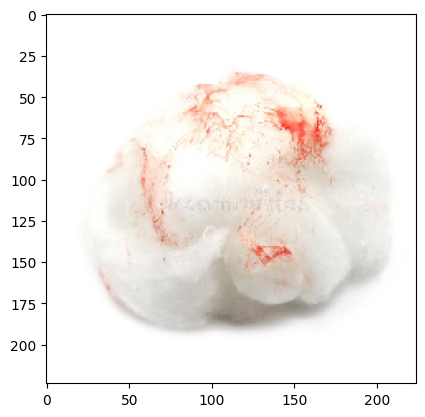

In [ ]:
img_path = '/content/drive/MyDrive/dataset/ blood cotton/Image_1.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

1/1 [==============================] - 1s 943ms/step
[[1.6003827e-20 1.0000000e+00 1.1588405e-13 5.2875859e-33]]
[1]
hazardous


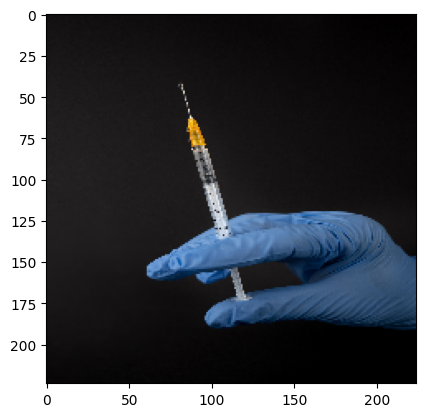

In [ ]:
img_path = '/content/drive/MyDrive/newdata/train/hazardous/medical 1547.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

In [ ]:
img = '/content/drive/MyDrive/newdata/train/general/tetra_pak 790.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

1/1 [==============================] - 1s 885ms/step
[[1.6003827e-20 1.0000000e+00 1.1588405e-13 5.2875859e-33]]
[1]
hazardous


1/1 [==============================] - 1s 509ms/step
[[1.6003827e-20 1.0000000e+00 1.1588405e-13 5.2875859e-33]]
[1]
hazardous


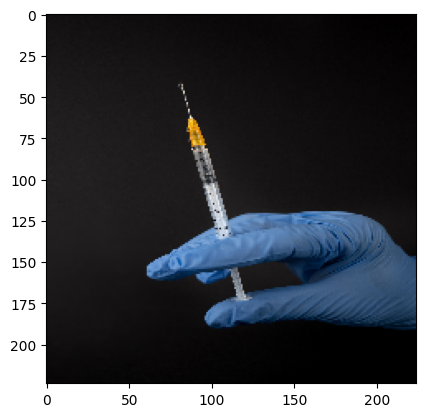

In [ ]:
img = '/content/drive/MyDrive/dataset/gloves/Image_2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])

1/1 [==============================] - 0s 480ms/step
[[1.6003827e-20 1.0000000e+00 1.1588405e-13 5.2875859e-33]]
[1]
hazardous


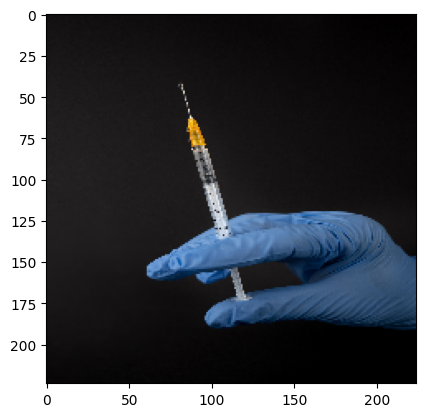

In [ ]:
img = '/content/drive/MyDrive/dataset/syringe/Image_2.jpg'
img = image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ["general","hazardous","infectious","radioactive"]
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1) 
# print the label of the class with maximum score
print(preds)
print(pred)
print(class_labels[pred[0]])